# 1) Equilibrio estático

In [89]:
import csv

# Nombre del archivo CSV
archivo_csv = "Actividad-1.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "mgr (Kg (m/s)^2)": [0.000610736, 0.000517832, 0.000455504, 0.000728336, 0.000363776, 0.000336336]
Columna "Δmgr (Kg (m/s)^2)": [7.6343006411852e-05, 6.4730186968678e-05, 5.6939349381601e-05, 9.104284391428e-05, 4.5473689623781e-05, 4.204382746611e-05]
Columna "B (T) ": [0.00272, 0.002584, 0.002312, 0.002992, 0.002176, 0.00204]
Columna "ΔB(T)": [7e-05, 7e-05, 7e-05, 7e-05, 7e-05, 7e-05]


In [90]:
#mgr
mgr = columnas["mgr (Kg (m/s)^2)"] # Kg (m/s)^2

#incertidumbre en mgr
dmgr = columnas["Δmgr (Kg (m/s)^2)"] # Kg (m/s)^2


In [91]:
#mgr
B = columnas["B (T) "] # T

#incertidumbre en mgr
dB = columnas["ΔB(T)"] # T

Pendiente: 2.38 ± 0.16 (A m^2)^(-1)
Intercepto: 0.0013 ± 0.0001 (T)


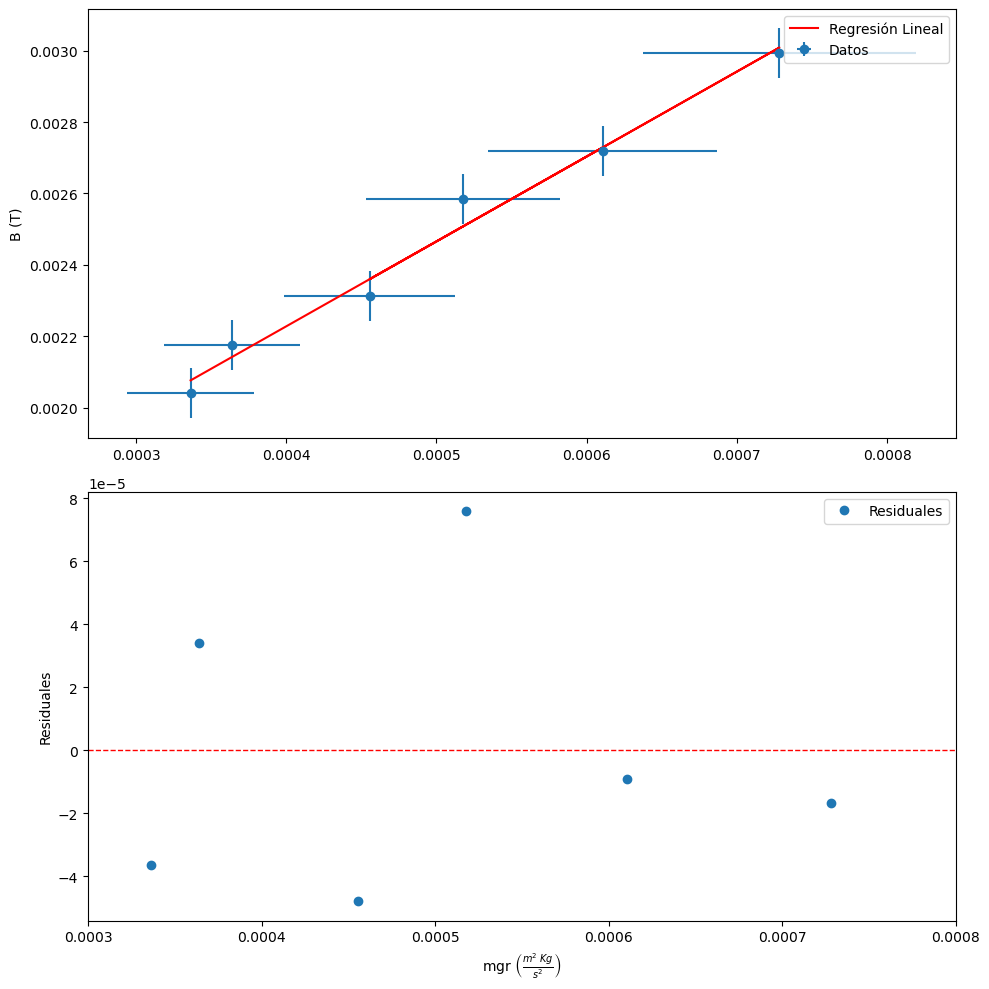

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(mgr, B)

# Calcular la desviación estándar del intercepto
a = sum([(i - np.mean(mgr))**2 for i in mgr]) / len(mgr) + (np.mean(mgr))**2
std_intercept = std_err * np.sqrt(a)

# Imprimir los resultados
print(f"Pendiente: {slope:.2f} ± {std_err:.2f} (A m^2)^(-1)")
print(f"Intercepto: {intercept:.4f} ± {std_intercept:.4f} (T)")

# Calcular los valores predichos
predicted_B = [intercept + slope * x for x in mgr]

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Graficar la regresión con barras de error en el primer subgráfico
ax1.errorbar(mgr, B, xerr=dmgr, yerr=dB, fmt='o', label='Datos')
ax1.plot(mgr, predicted_B, label='Regresión Lineal', color='red')
#ax1.set_xlabel(r'mgr $\left ( \frac{m^2 \;Kg}{s^2} \right )$')
ax1.set_ylabel('B (T)')
ax1.legend()

# Calcular los residuales
residuals = [B[i] - predicted_B[i] for i in range(len(B))]

# Graficar los residuales con barras de error en el segundo subgráfico
ax2.errorbar(mgr, residuals, fmt='o', label='Residuales')
ax2.axhline(0, color='red', linestyle='--', linewidth=1)
ax2.set_xlabel(r'mgr $\left ( \frac{m^2 \;Kg}{s^2} \right )$')
ax2.set_ylabel('Residuales')
ax2.set_xlim(0.0003, 0.0008)
ax2.legend()

plt.tight_layout()
plt.show()


Ahora, la pendiente sigue la relación:

$$ \mu = \frac{1}{m},$$

$$ \Delta \mu = \left | \frac{\Delta m}{m^2} \right |. $$

Entonces encontramos que:

$$ \mu = 0.42 A m^2 ,$$

$$ \Delta \mu = 0.03 A m^2. $$


# 2) Oscilación armónica

In [94]:
import csv

# Nombre del archivo CSV
archivo_csv = "Actividad-2.csv"

# Diccionario para almacenar las listas por columna
Columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        Columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            Columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in Columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "T^2 (s^2) ": [2.544025, 2.2201, 1.96, 1.703025, 1.5376, 1.380625, 1.2544, 1.1664, 1.050625, 0.9801, 0.9025]
Columna "ΔT^2 (s^2)": [0.002544025, 0.0022201, 0.00196, 0.001703025, 0.0015376, 0.001380625, 0.0012544, 0.0011664, 0.001050625, 0.0009801, 0.0009025]
Columna "1/B (1/T)": [735.29411764706, 668.44919786096, 525.21008403361, 459.55882352941, 408.49673202614, 367.64705882353, 334.22459893048, 306.37254901961, 282.80542986425, 262.60504201681, 245.09803921569]
Columna "Δ1/B (1/T)": [37.846020761246, 31.277703108467, 19.309194265942, 14.783601859862, 11.680870605323, 9.4615051903114, 7.8194257771169, 6.570489715494, 5.5985237812494, 4.8272985664854, 4.2051134179162]


In [101]:
#1/B
subB = Columnas["1/B (1/T)"] # 1/T

#incertidumbre en 1/B
dsubB = Columnas["Δ1/B (1/T)"] # 1/T

In [102]:
#T
T_2 = Columnas["T^2 (s^2) "] # s^2

#incertidumbre en mgr
dT_2 = Columnas["ΔT^2 (s^2)"] # s^2

Pendiente: 0.0032 ± 0.0001 (Kg/A)^(-1)
Intercepto: 0.17 ± 0.05 (s^2)


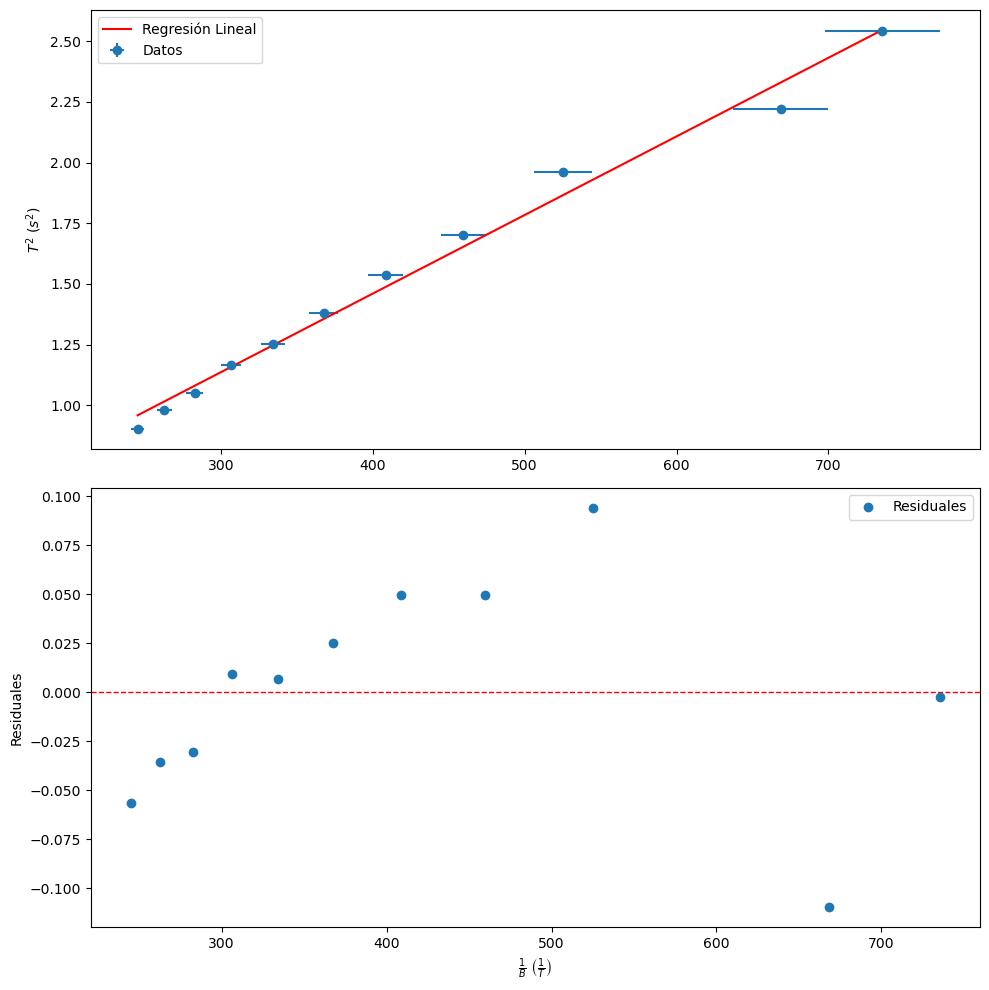

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(subB, T_2)

# Calcular la desviación estándar del intercepto
a = sum([(i - np.mean(subB))**2 for i in subB]) / len(subB) + (np.mean(subB))**2
std_intercept = std_err * np.sqrt(a)

# Imprimir los resultados
print(f"Pendiente: {slope:.4f} ± {std_err:.4f} (Kg/A)^(-1)")
print(f"Intercepto: {intercept:.2f} ± {std_intercept:.2f} (s^2)")

# Calcular los valores predichos
predicted_T_2 = [intercept + slope * x for x in subB]

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Graficar la regresión con barras de error en el primer subgráfico
ax1.errorbar(subB, T_2, xerr=dsubB, yerr=dT_2, fmt='o', label='Datos')
ax1.plot(subB, predicted_T_2, label='Regresión Lineal', color='red')
#ax1.set_xlabel(r'subB $\left ( \frac{m^2 \;Kg}{s^2} \right )$')
ax1.set_ylabel(r'$T^2$ ($s^2$)')
ax1.legend()

# Calcular los residuales
residuals = [T_2[i] - predicted_T_2[i] for i in range(len(T_2))]

# Graficar los residuales con barras de error en el segundo subgráfico
ax2.errorbar(subB, residuals, fmt='o', label='Residuales')
ax2.axhline(0, color='red', linestyle='--', linewidth=1)
ax2.set_xlabel(r'$\frac{1}{B}$ $\left ( \frac{1}{T} \right )$')
ax2.set_ylabel('Residuales')
ax2.legend()

plt.tight_layout()
plt.show()


Ahora, la pendiente sigue la relación:

$$ \mu = \frac{8 \pi^2 MR^2}{5m},$$

$$ \Delta \mu = \frac{8 \pi^2}{5} \sqrt{\left ( \frac{\Delta M R^2}{m} \right )^2 + \left ( \frac{2 M R \Delta R}{m} \right )^2 + \left ( - \frac{MR^2 \Delta m}{m^2} \right )^2}. $$

Entonces encontramos que:

$$ \mu = 0.46 A m^2 ,$$

$$ \Delta \mu = 0.02 A m^2. $$